####**Step1:-Mounting the drive.**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

file_path = '/content/drive/MyDrive/Project/NAFLD_DATASET/indian_liver_patient.csv'
df = pd.read_csv(file_path)

####**Step2:-Loading and Exploring the ILPD Dataset**

In [6]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Project/NAFLD_DATASET/indian_liver_patient.csv'
df = pd.read_csv(file_path)

# View column names
print("🔍 Column Names:")
print(df.columns.tolist())

# Display first few rows
print("\n🔹 First 5 rows:")
display(df.head())

# Dataset shape
print(f"\n🔹 Dataset Shape: {df.shape}")

# Data types and non-null counts
print("\n🔹 Dataset Info:")
df.info()

# Summary statistics
print("\n🔹 Summary Statistics:")
display(df.describe())

# Missing values check
print("\n🔹 Missing Values:")
display(df.isnull().sum())

# Class distribution
print("\n🔹 Class Distribution (Target Column):")
display(df['Target'].value_counts())

🔍 Column Names:
['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target']

🔹 First 5 rows:


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1



🔹 Dataset Shape: (583, 11)

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB

🔹 Summary Statistics:


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000



🔹 Missing Values:


,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4



🔹 Class Distribution (Target Column):


,Target
1,416
2,167


####**Step3:-Preprocessing the ILPD Dataset.**

In [7]:
# Step 2.1: Filling missing values in 'Albumin_and_Globulin_Ratio' with median
median_value = df['Albumin_and_Globulin_Ratio'].median()
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(median_value)

# Step 2.2: Encode 'Gender': Male = 1, Female = 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Step 2.3: Relabel 'Target': 1 = liver disease, 0 = no disease
df['Target'] = df['Target'].map({1: 1, 2: 0})

# Step 2.4: Post-checks
print("\n✅ Missing Values (should be 0):")
print(df.isnull().sum())

print("\n✅ Gender Encoding Check:")
print(df['Gender'].value_counts())

print("\n✅ Target Class Distribution (After Relabeling):")
print(df['Target'].value_counts())



✅ Missing Values (should be 0):
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

✅ Gender Encoding Check:
1    441
0    142
Name: Gender, dtype: int64

✅ Target Class Distribution (After Relabeling):
1    416
0    167
Name: Target, dtype: int64


###**Step4:-Visualizing and understanding our Data**

#####**Step4.1:- Class Imbalance (Target Column)**



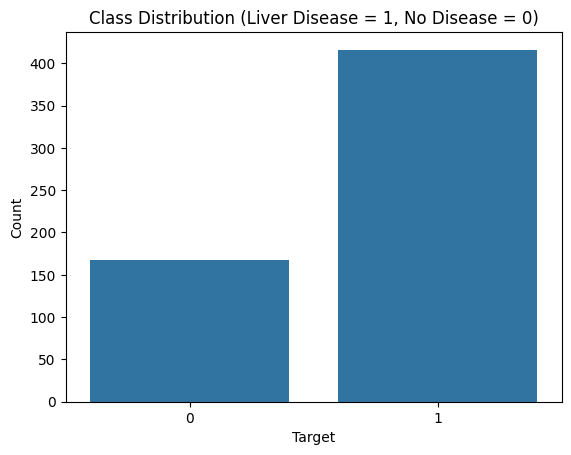

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Target', data=df)
plt.title('Class Distribution (Liver Disease = 1, No Disease = 0)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

##### **Step4.2:- Feature Distributions by Class (Boxplots)**

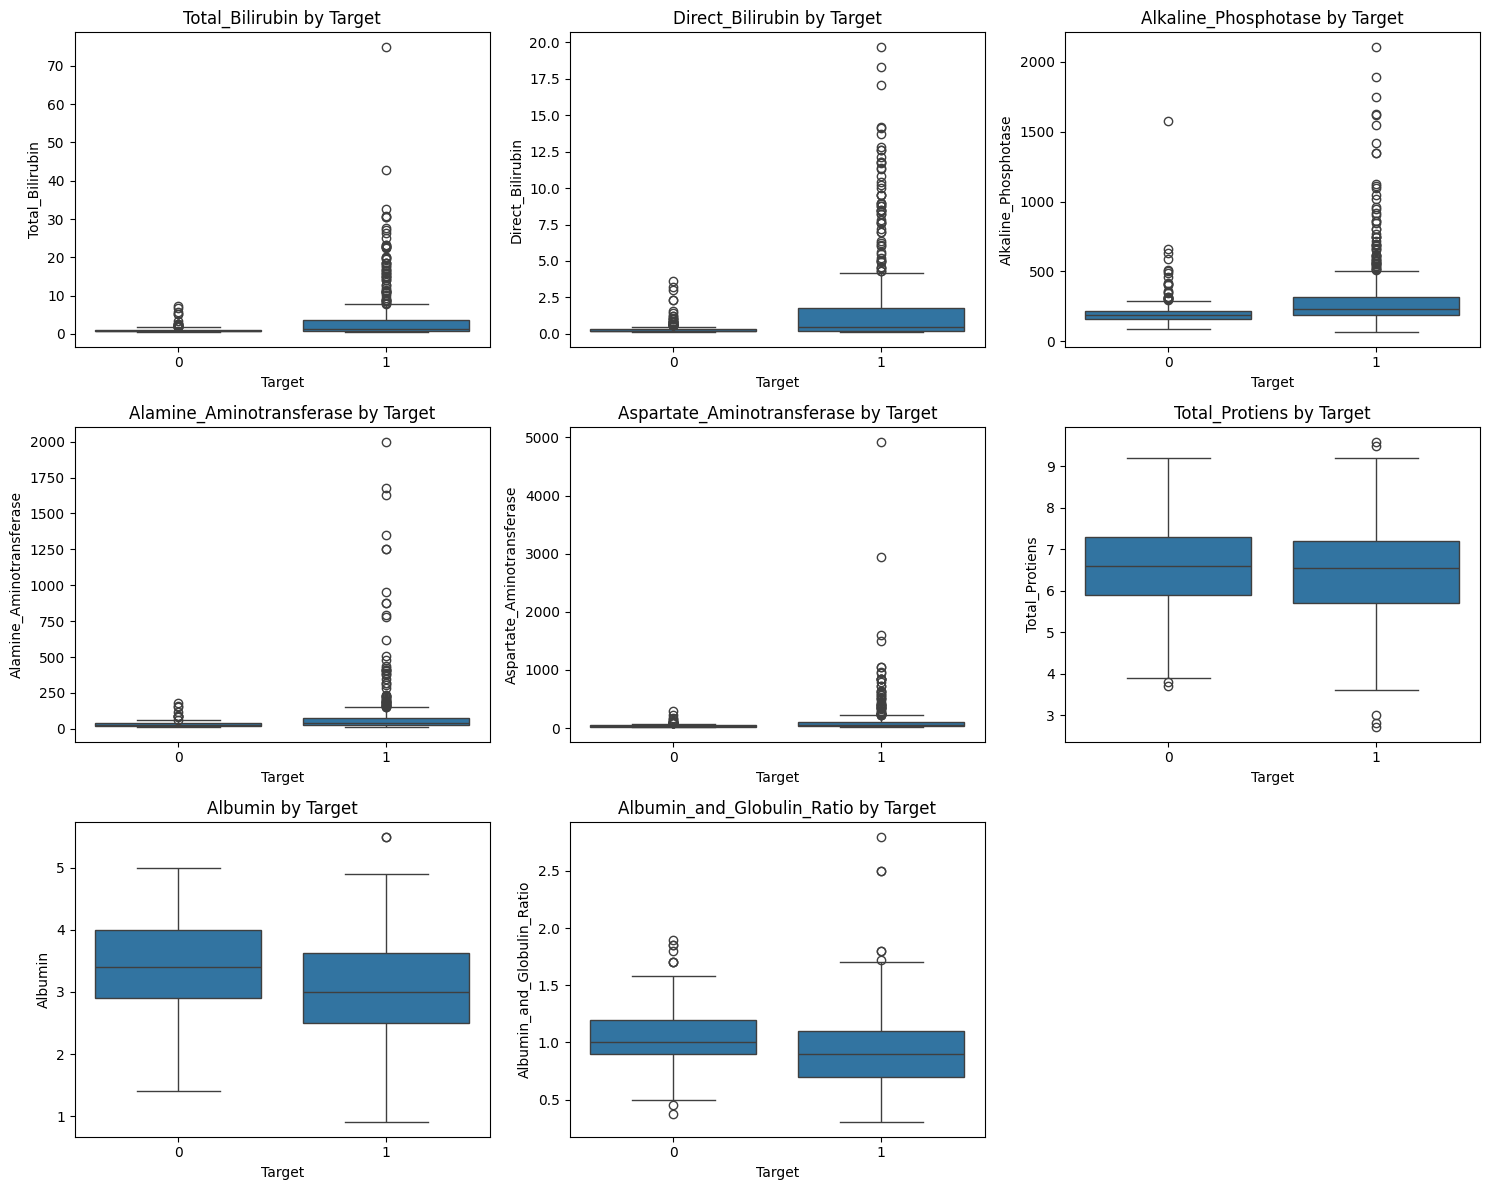

In [9]:
numeric_features = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                    'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
                    'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Target', y=col, data=df)
    plt.title(f'{col} by Target')
plt.tight_layout()
plt.show()


#####**Step4.3:- Feature Relationships (Correlation Heatmap)**

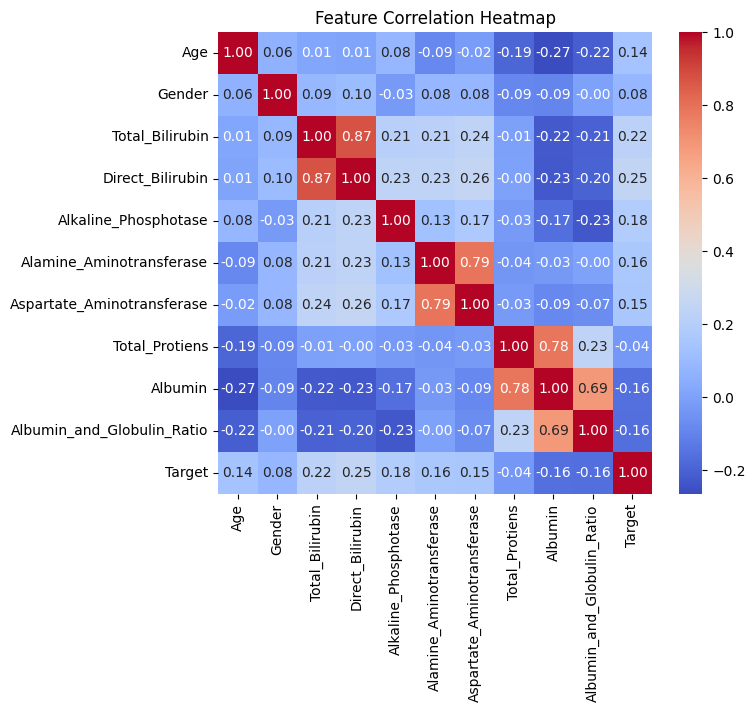

In [10]:
plt.figure(figsize=(7, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

###** Step5:- Train-Validation-Test Split (with Stratification)**

In [11]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

# First split: 70% train, 30% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42)

# Second split: 15% val, 15% test from the temp set
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# Print shapes to confirm
print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

# Class distribution check
print("\nClass Distribution:")
print("Train:", y_train.value_counts().to_dict())
print("Val:", y_val.value_counts().to_dict())
print("Test:", y_test.value_counts().to_dict())


Train set: (408, 10), (408,)
Validation set: (87, 10), (87,)
Test set: (88, 10), (88,)

Class Distribution:
Train: {1: 291, 0: 117}
Val: {1: 62, 0: 25}
Test: {1: 63, 0: 25}


####**Step5.1:- Adding Feature Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np

# Initialize scaler
scaler = StandardScaler()

# Fit only on training features
X_train_scaled = scaler.fit_transform(X_train)

# 🔽 Add this line to save the scaler
joblib.dump(scaler, "scaler.joblib")
print("✅ Scaler saved as 'scaler.joblib'")

# Transform validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Check scaled stats
print("Mean of X_train_scaled (should be ~0):")
print(np.round(X_train_scaled.mean(axis=0), 2))
print("\nStd of X_train_scaled (should be ~1):")
print(np.round(X_train_scaled.std(axis=0), 2))


✅ Scaler saved as 'scaler.joblib'
Mean of X_train_scaled (should be ~0):
[ 0.  0.  0.  0.  0.  0. -0.  0.  0. -0.]

Std of X_train_scaled (should be ~1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


###**Step 6:- Applying SMOTE (Synthetic Minority Over-sampling Technique)**
"We used SMOTE to fix the imbalance in training data so the model won’t ignore the minority class."

In [13]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE on scaled training set
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# Check new class distribution
from collections import Counter
print("🔍 Class Distribution After SMOTE:")
print(Counter(y_train_bal))

🔍 Class Distribution After SMOTE:
Counter({1: 291, 0: 291})


###**Step 7:-Training and Evaluating Different ML Models**



####**1. Logistic Regression**

📊 Logistic Regression Evaluation on Validation Set:
Accuracy: 0.6206896551724138
Precision: 0.8222222222222222
Recall: 0.5967741935483871
F1 Score: 0.6915887850467289


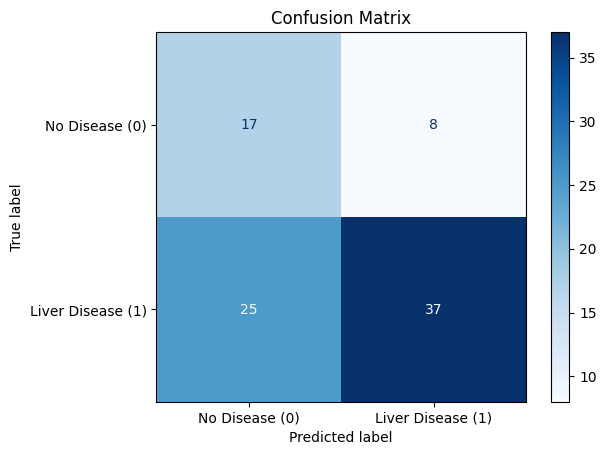

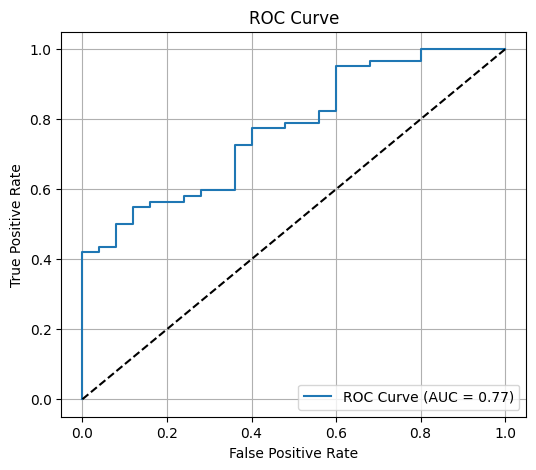

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Initialize and train
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_bal, y_train_bal)

# Step 2: Predict on validation set
y_val_pred = lr_model.predict(X_val_scaled)

# Step 3: Evaluate
print("📊 Logistic Regression Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))

# Step 4: Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay(cm, display_labels=["No Disease (0)", "Liver Disease (1)"]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Step 5: ROC Curve
y_val_prob = lr_model.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
auc = roc_auc_score(y_val, y_val_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


####**2. Random Forest Classifier**



📊 Random Forest Evaluation on Validation Set:
Accuracy: 0.7126436781609196
Precision: 0.7936507936507936
Recall: 0.8064516129032258
F1 Score: 0.8


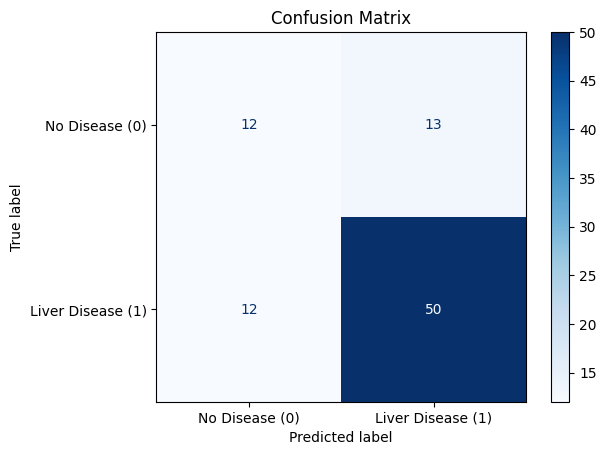

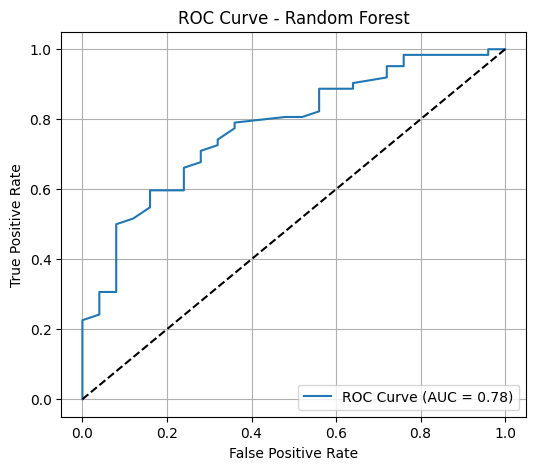

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Initialize and train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

# Step 2: Predict on validation set
y_val_pred_rf = rf_model.predict(X_val_scaled)

# Step 3: Evaluate
print("📊 Random Forest Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Precision:", precision_score(y_val, y_val_pred_rf))
print("Recall:", recall_score(y_val, y_val_pred_rf))
print("F1 Score:", f1_score(y_val, y_val_pred_rf))

# Step 4: Confusion matrix
cm_rf = confusion_matrix(y_val, y_val_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=["No Disease (0)", "Liver Disease (1)"]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Step 5: ROC Curve
y_val_prob_rf = rf_model.predict_proba(X_val_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_prob_rf)
auc_rf = roc_auc_score(y_val, y_val_prob_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#####**2.1. Random Forest – Hyperparameter Tuning with GridSearchCV**

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

📊 Tuned Random Forest on Validation Set:
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.735632183908046
Precision: 0.819672131147541
Recall: 0.8064516129032258
F1 Score: 0.8130081300813008


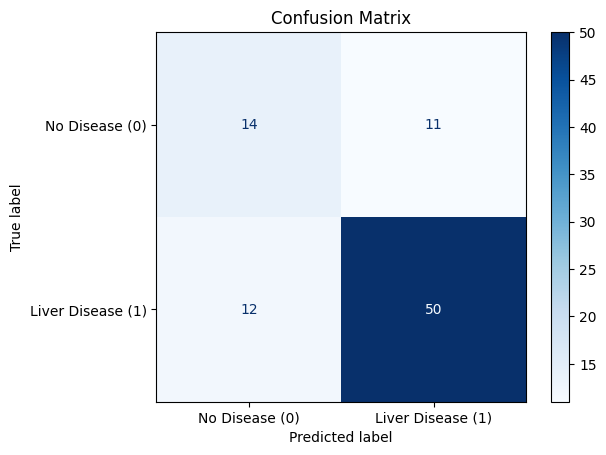

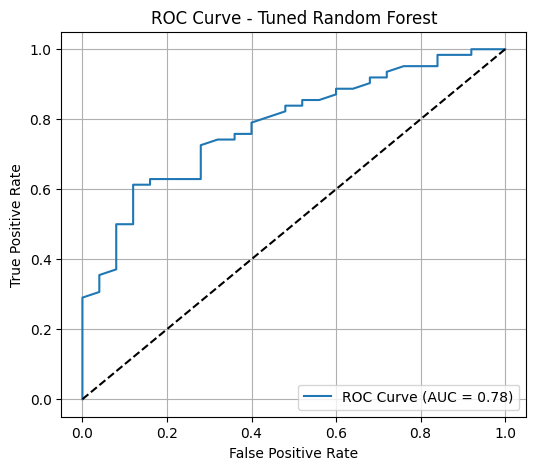

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Parameter grid for tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize model
rf_base = RandomForestClassifier(random_state=42)

# GridSearchCV with 5-fold cross-validation
grid_rf = GridSearchCV(estimator=rf_base,
                       param_grid=rf_param_grid,
                       scoring='f1',
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# Fit on SMOTE-balanced training set
grid_rf.fit(X_train_bal, y_train_bal)

# Best model from search
best_rf = grid_rf.best_estimator_

# Evaluate on validation set
y_val_pred_rf_best = best_rf.predict(X_val_scaled)

print("📊 Tuned Random Forest on Validation Set:")
print("Best Params:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_val, y_val_pred_rf_best))
print("Precision:", precision_score(y_val, y_val_pred_rf_best))
print("Recall:", recall_score(y_val, y_val_pred_rf_best))
print("F1 Score:", f1_score(y_val, y_val_pred_rf_best))

# Confusion matrix
cm_rf_best = confusion_matrix(y_val, y_val_pred_rf_best)
ConfusionMatrixDisplay(cm_rf_best, display_labels=["No Disease (0)", "Liver Disease (1)"]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_val_prob_rf_best = best_rf.predict_proba(X_val_scaled)[:, 1]
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_val, y_val_prob_rf_best)
auc_rf_best = roc_auc_score(y_val, y_val_prob_rf_best)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf_best, tpr_rf_best, label=f"ROC Curve (AUC = {auc_rf_best:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#####**2.2. Random Forest – Hyperparameter Tuning with RandomizedSearchCV**

Fitting 5 folds for each of 30 candidates, totalling 150 fits
📊 Advanced Tuned Random Forest on Validation Set:
Best Params: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 385}
Accuracy: 0.7471264367816092
Precision: 0.8225806451612904
Recall: 0.8225806451612904
F1 Score: 0.8225806451612904


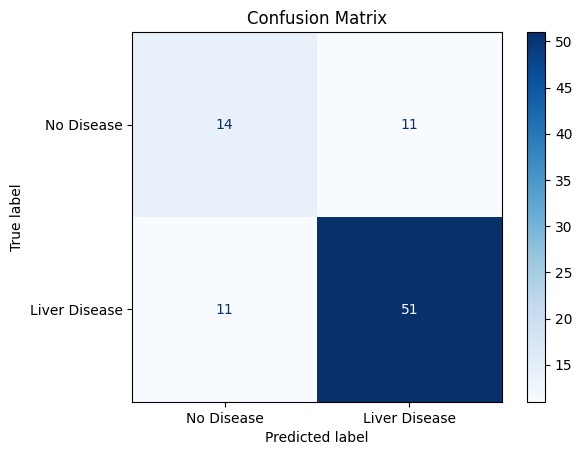

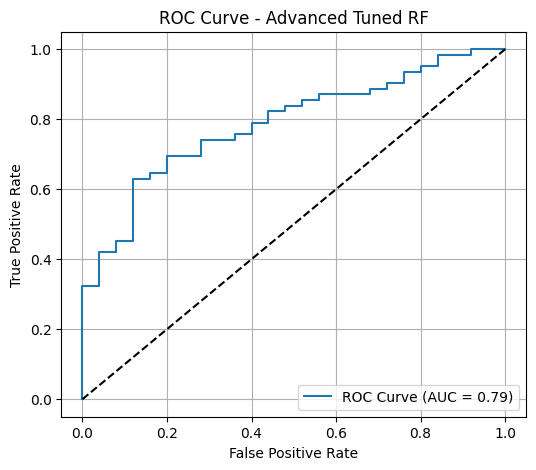

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from scipy.stats import randint
import matplotlib.pyplot as plt

# Slightly refined search space
rf_param_dist = {
    'n_estimators': randint(150, 400),
    'max_depth': [None, 8, 12, 16],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Set up RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=30,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data (SMOTE balanced)
random_search_rf.fit(X_train_bal, y_train_bal)

# Best model
best_rf_advanced = random_search_rf.best_estimator_

# Predict on validation set
y_val_pred_advanced = best_rf_advanced.predict(X_val_scaled)

# Evaluate
print("📊 Advanced Tuned Random Forest on Validation Set:")
print("Best Params:", random_search_rf.best_params_)
print("Accuracy:", accuracy_score(y_val, y_val_pred_advanced))
print("Precision:", precision_score(y_val, y_val_pred_advanced))
print("Recall:", recall_score(y_val, y_val_pred_advanced))
print("F1 Score:", f1_score(y_val, y_val_pred_advanced))

# Confusion matrix
cm_adv = confusion_matrix(y_val, y_val_pred_advanced)
ConfusionMatrixDisplay(cm_adv, display_labels=["No Disease", "Liver Disease"]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_val_prob_advanced = best_rf_advanced.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_prob_advanced)
auc = roc_auc_score(y_val, y_val_prob_advanced)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Advanced Tuned RF")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


####**3. Support Vector Machine (SVM)**

📊 SVM Evaluation on Validation Set:
Accuracy: 0.6436781609195402
Precision: 0.8444444444444444
Recall: 0.6129032258064516
F1 Score: 0.7102803738317757


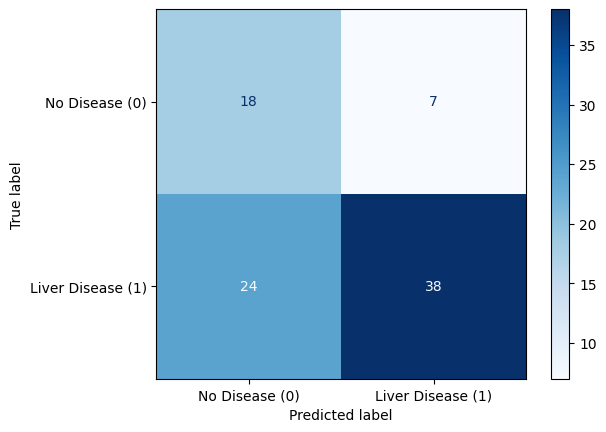

In [ ]:
from sklearn.svm import SVC

# Step 1: Initialize and train
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_bal, y_train_bal)

# Step 2: Predict on validation set
y_val_pred_svm = svm_model.predict(X_val_scaled)

# Step 3: Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

print("📊 SVM Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print("Precision:", precision_score(y_val, y_val_pred_svm))
print("Recall:", recall_score(y_val, y_val_pred_svm))
print("F1 Score:", f1_score(y_val, y_val_pred_svm))

# Step 4: Confusion matrix
cm_svm = confusion_matrix(y_val, y_val_pred_svm)
ConfusionMatrixDisplay(cm_svm, display_labels=["No Disease (0)", "Liver Disease (1)"]).plot(cmap="Blues")

####**4. XGBoost Classifier**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:11:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 XGBoost Evaluation on Validation Set:
Accuracy: 0.6896551724137931
Precision: 0.7777777777777778
Recall: 0.7903225806451613
F1 Score: 0.784


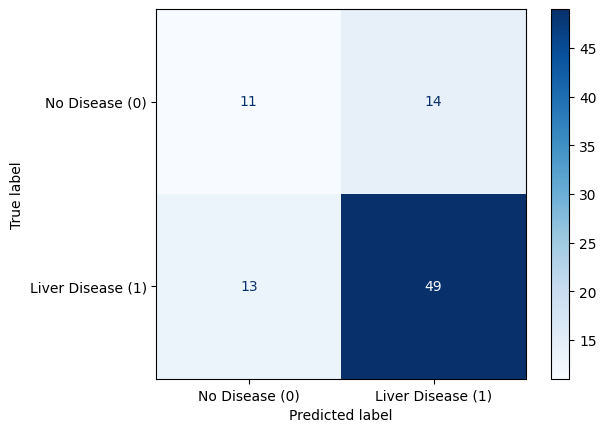

In [ ]:
# Step 1: Install XGBoost (if not already installed)
!pip install xgboost --quiet

# Step 2: Import and train
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Create and fit the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_bal, y_train_bal)

# Step 3: Predict on validation set
y_val_pred_xgb = xgb_model.predict(X_val_scaled)

# Step 4: Evaluate
print("📊 XGBoost Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_xgb))
print("Precision:", precision_score(y_val, y_val_pred_xgb))
print("Recall:", recall_score(y_val, y_val_pred_xgb))
print("F1 Score:", f1_score(y_val, y_val_pred_xgb))

# Step 5: Confusion matrix
cm_xgb = confusion_matrix(y_val, y_val_pred_xgb)
ConfusionMatrixDisplay(cm_xgb, display_labels=["No Disease (0)", "Liver Disease (1)"]).plot(cmap="Blues")


####**5. Voting Classifier**

📊 Voting Classifier Evaluation on Validation Set:
Accuracy: 0.7241379310344828
Precision: 0.8166666666666667
Recall: 0.7903225806451613
F1 Score: 0.8032786885245902


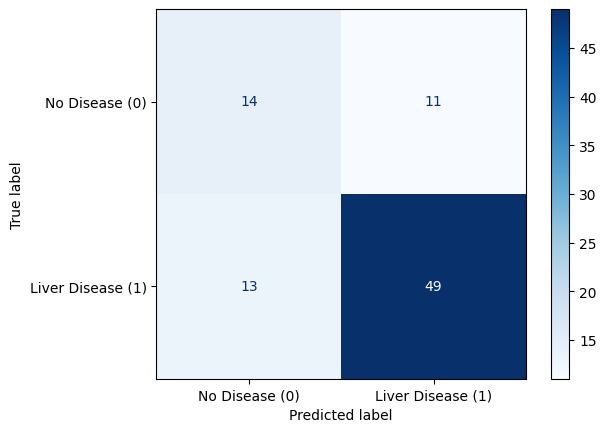

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Step 1: Define models
log_clf = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)

# Step 2: Combine into a VotingClassifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('xgb', xgb_clf)],
    voting='soft'
)

# Step 3: Train on balanced training set
voting_clf.fit(X_train_bal, y_train_bal)

# Step 4: Predict and evaluate on validation set
y_val_pred_voting = voting_clf.predict(X_val_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

print("📊 Voting Classifier Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_voting))
print("Precision:", precision_score(y_val, y_val_pred_voting))
print("Recall:", recall_score(y_val, y_val_pred_voting))
print("F1 Score:", f1_score(y_val, y_val_pred_voting))

# Confusion Matrix
cm_voting = confusion_matrix(y_val, y_val_pred_voting)
ConfusionMatrixDisplay(cm_voting, display_labels=["No Disease (0)", "Liver Disease (1)"]).plot(cmap="Blues")


####**6. Extra Trees Calssifier**

📊 Extra Trees Classifier Evaluation on Validation Set:
Accuracy: 0.7126436781609196
Precision: 0.7936507936507936
Recall: 0.8064516129032258
F1 Score: 0.8


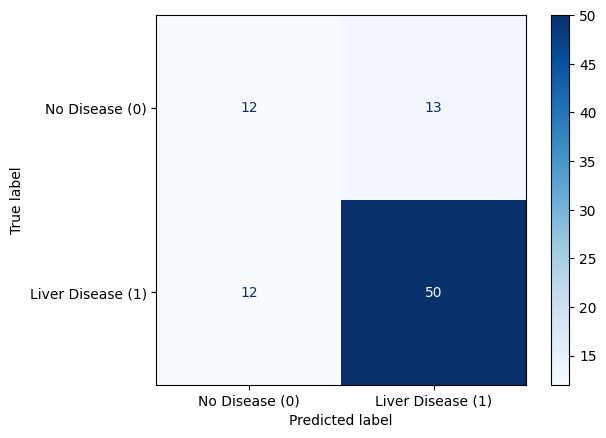

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Initialize and train Extra Trees
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train_bal, y_train_bal)

# Step 2: Predict on validation set
y_val_pred_et = et_model.predict(X_val_scaled)

# Step 3: Evaluate
print("📊 Extra Trees Classifier Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_et))
print("Precision:", precision_score(y_val, y_val_pred_et))
print("Recall:", recall_score(y_val, y_val_pred_et))
print("F1 Score:", f1_score(y_val, y_val_pred_et))

# Step 4: Confusion Matrix
cm_et = confusion_matrix(y_val, y_val_pred_et)
ConfusionMatrixDisplay(cm_et, display_labels=["No Disease (0)", "Liver Disease (1)"]).plot(cmap="Blues")



###**Step 9:-Testing the Final Tuned Random Forest Model on the test set**


📊 Final Random Forest on Test Set:
Accuracy: 0.6590909090909091
Precision: 0.7704918032786885
Recall: 0.746031746031746
F1 Score: 0.7580645161290323


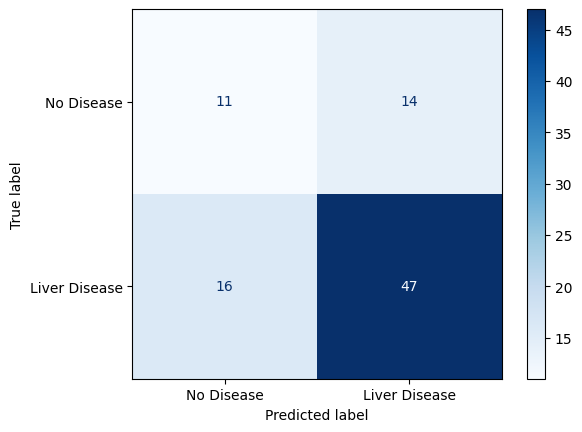

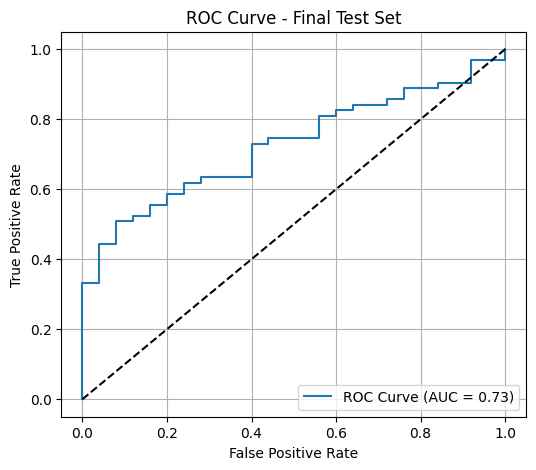

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Final evaluation on the test set
y_test_pred = best_rf_advanced.predict(X_test_scaled)

print("📊 Final Random Forest on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=["No Disease", "Liver Disease"]).plot(cmap="Blues")

# ROC Curve and AUC Score
y_test_prob = best_rf_advanced.predict_proba(X_test_scaled)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr_test, tpr_test, label=f"ROC Curve (AUC = {auc_test:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Final Test Set")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


###**Step 9:-Saving the Final Tuned Random Forest Model**



In [28]:
import joblib

# Save the model
joblib.dump(best_rf_advanced, 'final_rf_model.joblib')
print("✅ Model saved as 'final_rf_model.joblib'")


✅ Model saved as 'final_rf_model.joblib'
